# Coordinates and Dimensions of ECCOv4 NetCDF files

## Objectives

Introduce the student ot the idea that the ECCO v4 NetCDF fields have coordinate labels which shows *where* these fields are on the Arakawa-C grid.

## Introduction

As we showed in the first tutorial, we can use the `open_dataset` method from `xarray` to load a NetCDF tile file into Python as a `Dataset` object.  `open_dataset` is very convenient because it automatically parses the NetCDF file and constructs a `Dataset` object using all of the  dimensions, coordinates, variables, and metadata information.  

In the last tutorial we loaded a single ECCOv4 tile file, March 2010 average potential temperature and examined its contents.  Let's load it up again and take a closer look at its coordinates.  This time we'll name the new `Dataset` object *ecco_dataset* since we are loading the file using `open_dataset`.

In [19]:
import numpy as np
import xarray as xr
import sys
sys.path.append('/Users/ifenty/ECCOv4-py')
import ecco_v4_py as ecco

# define a high-level directory for ECCO fields
ECCO_dir = '/Users/ifenty/eccov4r3_native_grid_netcdf_tiles/'

# Load one tile of the llc90 grid
data_dir= ECCO_dir + '/mon_mean/THETA/2010/03/'

fname = 'THETA_2010_03_tile_02.nc'
theta_dataset = xr.open_dataset(data_dir + fname).load()

Before we get started, plot the temperature field at the surface layer (k=0) so that everything below has some context.

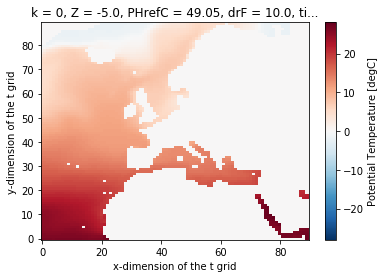

In [2]:
theta_dataset.THETA.isel(k=0).plot()

## The Dimensions and Coordinates of *THETA*

### Dimensions

This ``dataset`` is three spatial dimensional because it's single *Data variable*, ``THETA`` is three dimensional.  There is also one dummy dimension **nv** which is not a spatial dimension it is the second dimension of the two-dimensional array `time_bnds`.

The spatial dimensions are labelled **i**, **j**, and **k**. 

In [3]:
theta_dataset

<xarray.Dataset>
Dimensions:    (i: 90, j: 90, k: 50, nv: 2)
Coordinates:
    XC         (j, i) float32 -37.5 -36.5 -35.5 ... 50.968143 51.44421 51.837925
    YC         (j, i) float32 10.458642 10.458642 ... 67.53387 67.47211
    rA         (j, i) float32 11896091000.0 11896091000.0 ... 212633870.0
  * j          (j) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i          (i) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
    hFacC      (k, j, i) float32 1.0 1.0 1.0 1.0 1.0 1.0 ... 0.0 0.0 0.0 0.0 0.0
  * k          (k) int32 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
    Z          (k) float32 -5.0 -15.0 -25.0 -35.0 ... -5039.25 -5461.25 -5906.25
    PHrefC     (k) float32 49.05 147.15 245.25 ... 49435.043 53574.863 57940.312
    drF        (k) float32 10.0 10.0 10.0 10.0 10.0 ... 387.5 410.5 433.5 456.5
    time_bnds  (nv) datetime64[ns] 2010-03-01 2010-04-01
    tile       int32 2
    iter       int32 159948
    time       datetime64[ns] 2

```
<xarray.DataArray 'THETA' (k: 50, j: 90, i: 90)>
```

### Coordinates

#### Dimension Coordinates

Beyond having three dimensions *theta_dataset* also has *coordinates* in the **i**, **j**, and **k** directions.  The most basic coordinates are 1D vectors, one for each dimension, which contain *indices* for the array.  Let us call these basic coordinates, *dimension coordinates*.  Here we use 0 as the first index of dimension coordinates
```
* i          (i) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
```

Let's look at the three Dimension Coordinates more closely

##### Dimension Coordinate ``i``

In [4]:
theta_dataset.i

<xarray.DataArray 'i' (i: 90)>
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
      dtype=int32)
Coordinates:
  * i        (i) int32 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
    tile     int32 2
    iter     int32 159948
    time     datetime64[ns] 2010-03-16T12:00:00
Attributes:
    long_name:      x-dimension of the t grid
    standard_name:  x_grid_index
    swap_dim:       XC
    axis:           X

##### Dimension Coordinate ``j``

In [5]:
theta_dataset.j

<xarray.DataArray 'j' (j: 90)>
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
      dtype=int32)
Coordinates:
  * j        (j) int32 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
    tile     int32 2
    iter     int32 159948
    time     datetime64[ns] 2010-03-16T12:00:00
Attributes:
    long_name:      y-dimension of the t grid
    standard_name:  y_grid_index
    swap_dim:       YC
    axis:           Y

##### Dimension Coordinate ``k``

In [6]:
theta_dataset.k

<xarray.DataArray 'k' (k: 50)>
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], dtype=int32)
Coordinates:
  * k        (k) int32 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
    Z        (k) float32 -5.0 -15.0 -25.0 -35.0 ... -5039.25 -5461.25 -5906.25
    PHrefC   (k) float32 49.05 147.15 245.25 ... 49435.043 53574.863 57940.312
    drF      (k) float32 10.0 10.0 10.0 10.0 10.0 ... 387.5 410.5 433.5 456.5
    tile     int32 2
    iter     int32 159948
    time     datetime64[ns] 2010-03-16T12:00:00
Attributes:
    long_name:      z-dimension of the t grid
    standard_name:  z_grid_index
    swap_dim:       Z
    axis:           Z

#### Other Coordinates

Notice some *coordinates* do not have an "\*" in front of their names:
```             
Coordinates:
    XC         (j, i) float32 -37.5 -36.5 -35.5 ... 50.968143 51.44421 51.837925
    YC         (j, i) float32 10.458642 10.458642 ... 67.53387 67.47211
    rA         (j, i) float32 11896091000.0 11896091000.0 ... 212633870.0
    hFacC      (k, j, i) float32 1.0 1.0 1.0 1.0 1.0 1.0 ... 0.0 0.0 0.0 0.0 0.0
    Z          (k) float32 -5.0 -15.0 -25.0 -35.0 ... -5039.25 -5461.25 -5906.25
    PHrefC     (k) float32 49.05 147.15 245.25 ... 49435.043 53574.863 57940.312
    drF        (k) float32 10.0 10.0 10.0 10.0 10.0 ... 387.5 410.5 433.5 456.5
    time_bnds  (nv) datetime64[ns] 2010-03-01 2010-04-01
    tile       int32 2
    iter       int32 159948
    time       datetime64[ns] 2010-03-16T12:00:00
```

These are so-called [non-dimension coordinates](http://xarray.pydata.org/en/stable/data-structures.html#coordinates).  From the xarray documenation:

```
non-dimension coordinates are variables that contain coordinate data, but are not a dimension coordinate. They can be multidimensional ... and there is no relationship between the name of a non-dimension coordinate and the name(s) of its dimension(s). Non-dimension coordinates can be useful for indexing or plotting; ...
```

The three non-dimension coordinates that are linked to dimensions of the array are **XC** and **YC**, the longitude and latitudes of the 'c' points (at **j**, **i**), and **Z** which is the depth at the tracer cell (at **k**).  **PHrefC** is a reference pressure.

There are also three non-dimension coordinates that do not correspond to any dimensions at all!  Here they are **time** and **iter**, the value for the record and the model time step (model iteration) when the record was saved. The last is **tile**, the label of the the llc90 tiles.

When multiple DataArrays from different tiles and times are combined, the array dimensions will be expanded along the **time** and **tile** dimensions.  

##### Non-Dimension Coordinate ``tile``

The non-dimension coordinate ``tile`` here equals 2 (recall we loaded tile 2): 

In [7]:
theta_dataset.tile

<xarray.DataArray 'tile' ()>
array(2, dtype=int32)
Coordinates:
    tile     int32 2
    iter     int32 159948
    time     datetime64[ns] 2010-03-16T12:00:00
Attributes:
    standard_name:  tile_index

##### Non-Dimension Coordinate ``time``

While ``time`` is a special object ``datetime64`` which contains the *center time of the averaging period*.   Recall we loaded the monthly-mean ``THETA`` fields for March 2010.

In [8]:
theta_dataset.time

<xarray.DataArray 'time' ()>
array('2010-03-16T12:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    tile     int32 2
    iter     int32 159948
    time     datetime64[ns] 2010-03-16T12:00:00
Attributes:
    long_name:      center time of averaging period
    standard_name:  time
    bounds:         time_bnds
    axis:           T

##### Non-Dimension Coordinate ``time_bnds``

Another very important field is ``time_bnds``.  This is a 2D array provding the *start* and *end* time of the averaging period.  As this is a monthly-mean field for March, the *start* time is 2010-03-01 and the end time is 2010-04-01.  Having this information can be very helpful.

In [9]:
theta_dataset.time_bnds

<xarray.DataArray 'time_bnds' (nv: 2)>
array(['2010-03-01T00:00:00.000000000', '2010-04-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    time_bnds  (nv) datetime64[ns] 2010-03-01 2010-04-01
    tile       int32 2
    iter       int32 159948
    time       datetime64[ns] 2010-03-16T12:00:00
Dimensions without coordinates: nv
Attributes:
    long_name:      time bounds of averaging period
    standard_name:  time_bounds

## The Dimension Coordinates of the Arakawa C-Grid

Dimension coordinates have special meanings.  In **standard_name** and **long_name** attributes we see that they are indices corresponding to the **t** grid, meaing **t**racer cell of the staggered Arakawa-C grid (hereafter c-grid). In c-grid models, not all variables are horizontally located on tracer points.  Horizontally, variables can be associated with three 'locations': 1) tracer cells, 2) horizontal sides of the tracer cell, 3) tracer cell corners. Vertically, there are also two 'locations': 1) tracer cell, 2) vertical sides of the tracer cell (top/bottom).

To understand this issue better, let's briefly review the geometry of the c-grid coordinate system.

### 3D staggering of velocity components. 

From : https://mitgcm.readthedocs.io/en/latest/algorithm/c-grid.html

In c-grid models, the components of flow (𝑢,𝑣,𝑤) staggered in space such that the zonal component falls on the interface between continuity cells in the zonal direction. Similarly for the meridional and vertical directions. The continuity cell is synonymous with tracer cells (they are one and the same).*


![uvw-grid](../figures/uvw.png )

"The staggering of velocity components facilitates the natural discretization of the continuity and tracer equations. 


### The horizontal points of the c-grid


The staggered Arakawa-C grid (C-grid) has four different categories of horizontal point: **c**, **u**, **v**, **g**:

![c-grid](../figures/C-grid-points.png )



#### *c* points

Scalar variables (e.g., ``THETA, SALT, SSH, OBP, SIarea``) and variables associated with vertical velocity (e.g., ``WVEL``) are situated at the center of the tracer grid cell in the horizontal plane.  These are $c$ points

Define the coordinates $(i,j)$ for the discrete indices of $c$ points in the $x$ and $y$ directions, respectively.

In the ECCO v4 NetCDF files, $c(0,0)$ is the $-x$ most and $-y$ most tracer grid cell.

* In the +$y$ direction, the next $c$ point is $c(0,1)$.
* In the +$x$ direction, the next $c$ point is $c(1,0)$ 

#### *u* points

Vector variables related to horizontal velocity in the $x$ direction are  staggered along the edges of tracer cells between $c$ points in the horizontal plane. Examples include horizontal velocity in the $x$ direction (``UVEL``) and horizontal advective fluxes in the $x$ direction (e.g., ``ADVxSNOW``).  $u$ points are situated along the edges (if 2D) or faces (if 3D) of the tracer grid cells on either side of $c$ points in the $x$.

Define the coordinates $(i_g,j)$ for the indices of $u$ points in the $x$ and $y$ directions, respectively.

We use $i_g$ as the coordinate in the $x$ direction because $u$ points are situated along the tracer grid cell ed**g**es.  We use $j$ for its $y$ coordinate because $u$ points and $c$ points fall along the same lines in $y$.

In the ECCO v4 netCDF files, $u(0,0)$ is the $-x$ most and $-y$ most $u$ point.

#### *v* points

Vector variables related to horizontal velocity in the $y$ direction are  staggered along the edges of tracer cells between $c$ points in the horizontal plane. Examples include horizontal velocity in the $y$ direction (``VVEL``) and horizontal advective flux of snow in the $y$ direction (``ADVySNOW``).  They are situated along the edges (if 2D) or faces (if 3D) of the tracer grid cells in the $y$ direction.     

Define the coordinates $(i,j_g)$ for the indices of $v$ points in the $x$ and $y$ directions, respectively.

We use $j_g$ as the coordinate in the $y$ direction because $v$ points are situated along the tracer grid cell ed**g**es.  We use $i$ for its $x$ coordinate because $v$ points and $c$ points fall along the same lines in $x$.  

In the ECCO v4 NetCDF files, $v(0,0)$ is the $-x$ most and $-y$ most $v$ point.

#### *g* points

Model variables that are explictly related to horizontal velocities in **both** the $x$ and $y$ directions (vorticity) are situated at $g$ points in the horizontal plane.  $g$ points are the four **corners** of tracer grid cells.  

Define the coordinates $(i_g,j_g)$ for the indices of $g$ points in the $x$ and $y$ directions, respectively.  

We use $i_g$ and $j_g$ because $g$ points are on the ed**g**es (corners) of tracer grid cells.

In the ECCO v4 NetCDF files, $g(0,0)$ is the $-x$ most and $-y$ most $g$ point.

### The vertical points of the c-grid

The staggered Arakawa-C grid (C-grid) has two different categories of vertical point: **c**, **w**

#### *c* points

Variables that are not related to vertical velocity or vertical fluxes are situated at $k$ points in the vertical direction.  Define the coordinate $k$ for points situated in the center of the grid cells.

In the ECCO v4 NetCDF files, $k(0)$ is the middle of the uppermost tracer grid cell.

#### *w* points

Variables related to vertical velocity or vertical fluxes are situated at $w$ points in the vertical direction.  These variables are situated on the upper and lower faces of the tracer grid cell.   

Define the dimension coordinates $k_u$ and $k_l$ points using the same reasoning as above: $k_u$ and $k_l$ points fall along the the **u**pper and **l**ower faces of tracer grid cells in the $z$ direction, respectively.  $k_u$ and $k_l$ have 50 elements because there are 50 **u**pper faces (top) and 50 **l**ower (bottom) faces of ECCOv4 tracer grid cells.  

An auxillary coordinate $k_{p1}$ indexes all of the **upper** and **lower** faces and therefore has 51 elements. 

*In the ECCO v4 NetCDF files, $k_u(0)$ and $k_{p1}(0)$ both denote the uppermost grid cell surface.*

## All ECCOv4 dimension coordinates

*Theta* only uses **i, j, and k**.  To see all of the coordinates used let's load an ECCO grid netcdf tile file.

In [10]:
grid_dir = '/Users/ifenty/eccov4r3_native_grid_netcdf_tiles/grid/'
grid_name = 'ECCOv4r3_grid_tile_02.nc'
grid_dataset = xr.open_dataset(grid_dir + grid_name)
grid_dataset.attrs =[]
grid_dataset.load()

<xarray.Dataset>
Dimensions:  (i: 90, i_g: 90, j: 90, j_g: 90, k: 50, k_l: 50, k_p1: 51, k_u: 50)
Coordinates:
  * k_p1     (k_p1) int64 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49 50
  * j_g      (j_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i_g      (i_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k        (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * k_u      (k_u) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * k_l      (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
    tile     int64 2
    XC       (j, i) float32 -37.5 -36.5 -35.5 ... 50.968143 51.44421 51.837925
    YC       (j, i) float32 10.458642 10.458642 10.458642 ... 67.53387 67.47211
    XG       (j_g, i_g) float32 -38.0 -37.0 -36.0 ... 51.118958 51.588932

### Dimensions
`Dimensions:  (i: 90, i_g: 90, j: 90, j_g: 90, k: 50, k_l: 50, k_p1: 51, k_u: 50)`

The *Dimensions* list now lists the six different coordinates and their dimension used by variables stored in this new grid tile `Dataset` object.  

### Coordinates
##### Dimension Coordinates

```
  * k_p1     (k_p1) int64 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49 50
  * j_g      (j_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i_g      (i_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k        (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * k_u      (k_u) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * k_l      (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
``` 

We note that horizontal coords have 90 indices [0..89], $k_u$ and $k_l$ have 50 [0..49] and k_{p1} has 51 [0..50]


##### *Non-Dimension Coordinates* that can be used as spatial coordinates
```
    XC       (j, i) float32 ...
    YC       (j, i) float32 ...
    XG       (j_g, i_g) float32 ...
    YG       (j_g, i_g) float32 ...
    Zl       (k_l) float32 ...
    Zu       (k_u) float32 ...
    Z        (k) float32 ...
    Zp1      (k_p1) float32 ...
    Depth    (j, i) float32 ...
    PHrefC   (k) float32 ...
    PHrefF   (k_p1) float32 ...
```
* note other non-dimension coordinates are present but will be changed to Data Variables in future releases *

##### *Non-Dimension Coordinates* that are actually geometric grid measures 
```
    dxC      (j, i_g) float32 ...
    rAs      (j_g, i) float32 ...
    rAw      (j, i_g) float32 ...
    Depth    (j, i) float32 ...
    rA       (j, i) float32 ...
    dxG      (j_g, i) float32 ...
    dyG      (j, i_g) float32 ...
    rAz      (j_g, i_g) float32 ...
    dyC      (j_g, i) float32 ...
    drC      (k_p1) float32 ...
    drF      (k) float32 ...
    hFacS    (k, j_g, i) float32 ...
    hFacC    (k, j, i) float32 ...
    hFacW    (k, j, i_g) float32 ...
```

Some of the non-dimension coordinates are actually ancilliary geometric variables of the model and model grid (grid cell areas, horizontal distances, vertical distances, and geometric factors, and model depth). They are not coordinates in any meaningful sense but they *are essential for quantitative analysis*. 

The reason this ancilliary information is in the non-dimension coordinate category is simply that we reserve the category *data variables* for variables that are part of the model solution.   In the future we may change the classification of these fields *data variables* -- it doesn't really matter. In fact, you can use the function reset_coords() to change them all to data variables.  Try it if you like, grid_dataset.reset_coords()

Let's look at one of these geometric quantities, Instead they contain information about the geometry of the grid .  For example, consider the non-dimension coordinate ``dxG``:

In [11]:
grid_dataset.dxG

<xarray.DataArray 'dxG' (j_g: 90, i: 90)>
array([[109498.625, 109498.625, 109498.625, ..., 109498.625, 109498.625,
        109498.625],
       [109153.875, 109153.875, 109153.875, ..., 109153.875, 109153.875,
        109153.875],
       [108776.664, 108776.664, 108776.664, ..., 108776.664, 108776.664,
        108776.664],
       ...,
       [ 24995.342,  26019.037,  27603.951, ...,  27603.951,  26019.037,
         24995.342],
       [ 21862.79 ,  23614.71 ,  25916.31 , ...,  25916.31 ,  23614.71 ,
         21862.79 ],
       [ 17873.049,  21326.564,  24596.092, ...,  24596.092,  21326.564,
         17873.049]], dtype=float32)
Coordinates:
  * j_g      (j_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
    tile     int64 2
    rAs      (j_g, i) float32 11884406000.0 11884406000.0 ... 335292540.0
    dxG      (j_g, i) float32 109498.625 109498.625 ... 21326.564 17873.049
    dyC      (j_g, i) f

Note that ``dxG`` has coordinates $i$ and $j_g$, which mean that it is located at a 'v' point.  ``dxG`` is the horizontal distance between $g$ (cell corners) points in the $x$ direction.  


For reference, see the chart below from the MITgcm documentation, Figure 2.6:
https://mitgcm.readthedocs.io/en/latest/algorithm/horiz-grid.html

dxG = $\Delta x_g$ in subfigure (a) below:

       
![hgrid](../figures/hgrid-abcd.svg)


*Figure 2.6 Staggering of horizontal grid descriptors (lengths and areas). The grid lines indicate the tracer cell boundaries and are the reference grid for all panels. a) The area of a tracer cell, 𝐴𝑐, is bordered by the lengths Δ𝑥𝑔 and Δ𝑦𝑔. b) The area of a vorticity cell, 𝐴𝜁, is bordered by the lengths Δ𝑥𝑐 and Δ𝑦𝑐. c) The area of a u cell, 𝐴𝑤, is bordered by the lengths Δ𝑥𝑣 and Δ𝑦𝑓. d) The area of a v cell, 𝐴𝑠, is bordered by the lengths Δ𝑥𝑓 and Δ𝑦𝑢.*



## The Dimensions and Coordinates of *UVEL*

So far we looked ``THETA`` which is a $c$ point variable.  Let's examine a variable situated on a model $u$ point, horizontal velocity in the $x$ direction.


Load tile 2 of the 2010 March average velocity in the $x$ direction.

In [12]:
# Directory of the UVEL files
data_dir= ECCO_dir + '/mon_mean/UVEL/2010/03/'

fname = 'UVEL_2010_03_tile_02.nc'
uvel_dataset = xr.open_dataset(data_dir + fname).load()
uvel_dataset.attrs = []



### ``UVEL`` context

Plot the time-mean horizontal velocity at the top-most model grid cell in the tile's $x$ direction

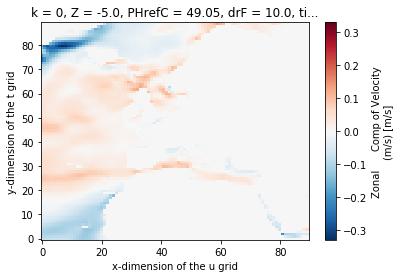

In [13]:
uvel_dataset.UVEL.sel(k=0).plot()

Let's look at *uvel_dataset* 

In [14]:
uvel_dataset.UVEL

<xarray.DataArray 'UVEL' (k: 50, j: 90, i_g: 90)>
array([[[-0.081476, -0.078937, ...,  0.      ,  0.      ],
        [-0.09575 , -0.092195, ...,  0.      ,  0.      ],
        ...,
        [ 0.      ,  0.      , ...,  0.      ,  0.      ],
        [ 0.      ,  0.      , ...,  0.      ,  0.      ]],

       [[-0.035361, -0.034133, ...,  0.      ,  0.      ],
        [-0.049959, -0.047672, ...,  0.      ,  0.      ],
        ...,
        [ 0.      ,  0.      , ...,  0.      ,  0.      ],
        [ 0.      ,  0.      , ...,  0.      ,  0.      ]],

       ...,

       [[ 0.      ,  0.      , ...,  0.      ,  0.      ],
        [ 0.      ,  0.      , ...,  0.      ,  0.      ],
        ...,
        [ 0.      ,  0.      , ...,  0.      ,  0.      ],
        [ 0.      ,  0.      , ...,  0.      ,  0.      ]],

       [[ 0.      ,  0.      , ...,  0.      ,  0.      ],
        [ 0.      ,  0.      , ...,  0.      ,  0.      ],
        ...,
        [ 0.      ,  0.      , ...,  0.      ,  0.   

### Dimension coordinates

As expected, ``UVEL`` uses the **i_g, j** coordinates to label its horizontal dimension. Because ``UVEL`` is the velocity  along the left and right sides of tracer cells we use **k** for its vertical coordinate.  The ordering of this  three-dimensional field is **k, j, i**.

### Non-Dimension coordinates

Included in the non-dimension coordinates of ``UVEL`` are **z**, the vertical depth of the cell center (meters) and PHrefC, the model's reference pressure at the cell center.

Let's look at the model grid cell center depth as a function of vertical **k** index:

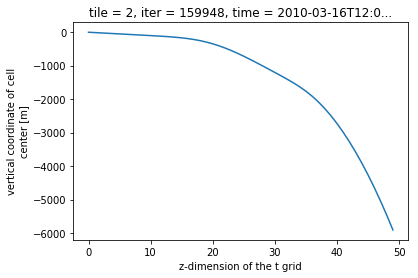

In [15]:
uvel_dataset.Z.plot()

## The Dimensions and Coordinates of ``VVEL``

Let's load tile 2 of the horizontal velocity in the $y$ direction, ``VVEL``, a $v$ point variable.

In [16]:
# Directory of the VVEL files
data_dir= ECCO_dir + '/mon_mean/VVEL/2010/03/'

fname = 'VVEL_2010_03_tile_02.nc'
vvel_dataset = xr.open_dataset(data_dir + fname).load()
vvel_dataset.attrs = []

### ``VVEL`` context

Plot the time-mean horizontal velocity in the tile's $y$ direction at model level 5 (55m) 

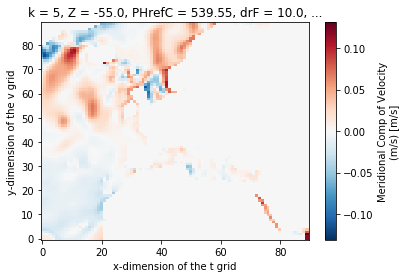

In [17]:
vvel_dataset.VVEL.sel(k=5).plot()

In [18]:
vvel_dataset.VVEL

<xarray.DataArray 'VVEL' (k: 50, j_g: 90, i: 90)>
array([[[0.022591, 0.018273, ..., 0.      , 0.15625 ],
        [0.021642, 0.020516, ..., 0.      , 0.153724],
        ...,
        [0.      , 0.      , ..., 0.      , 0.      ],
        [0.      , 0.      , ..., 0.      , 0.      ]],

       [[0.031768, 0.028298, ..., 0.      , 0.155365],
        [0.029948, 0.029558, ..., 0.      , 0.147858],
        ...,
        [0.      , 0.      , ..., 0.      , 0.      ],
        [0.      , 0.      , ..., 0.      , 0.      ]],

       ...,

       [[0.      , 0.      , ..., 0.      , 0.      ],
        [0.      , 0.      , ..., 0.      , 0.      ],
        ...,
        [0.      , 0.      , ..., 0.      , 0.      ],
        [0.      , 0.      , ..., 0.      , 0.      ]],

       [[0.      , 0.      , ..., 0.      , 0.      ],
        [0.      , 0.      , ..., 0.      , 0.      ],
        ...,
        [0.      , 0.      , ..., 0.      , 0.      ],
        [0.      , 0.      , ..., 0.      , 0.      ]]

### Dimension coordinates

As expected, ``VVEL`` uses the **i, j_g** coordinates to label its horizontal dimension. Because ``VVEL`` is the velocity through sides of tracer cells we use **k** for its vertical coordinate.  The ordering of this  three-dimensional field is **k, j_g, i**.

### Non-Dimension coordinates

**z** is also includes as a non-dimension coordinate of ``VVEL``

## Summary

You have now been introduced to the some of the dimension and coordinates used by the MITgcm and ECCO.
